# ML Assignment 01 - Uber Ride Price Prediction

Problem Statement <br>
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. <br>
Perform following tasks: <br>
    1. Pre-process the dataset.<br> 
    2. Identify outliers. <br>
    3. Check the correlation. <br>
    4. Implement linear regression and random forest regression models.<br> 
    5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

# Importing dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Data preprocessing

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
data = data.drop(['Unnamed: 0', 'key'], axis=1)

In [5]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [7]:
data.shape

(200000, 7)

In [8]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


checking for NULL values

In [10]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
data['dropoff_longitude'].fillna(value = data['dropoff_longitude'].mean(), inplace = True)

In [12]:
data['dropoff_latitude'].fillna(value = data['dropoff_latitude'].mean(), inplace = True)

In [13]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [15]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime, errors='coerce')
data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
data = data.assign(hour = data.pickup_datetime.dt.hour,
                  day = data.pickup_datetime.dt.day,
                  month = data.pickup_datetime.dt.month,
                  year = data.pickup_datetime.dt.year,
                  dayofweek = data.pickup_datetime.dt.dayofweek)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [17]:
data = data.drop('pickup_datetime', axis=1)

In [18]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


# Checking for outliers

<Axes: >

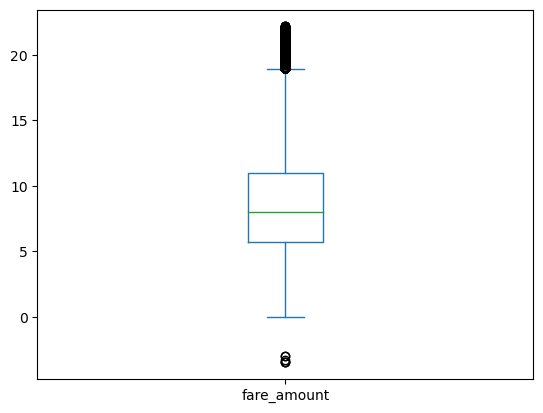

In [40]:
data['fare_amount'].plot(kind = "box")

In [42]:
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [47]:
data = data[(data['fare_amount'] >= lower_bound) & (data['fare_amount'] <= upper_bound)]
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661686
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475456


<Axes: >

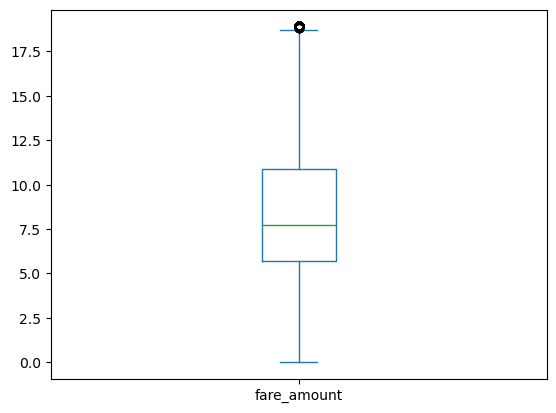

In [48]:
data['fare_amount'].plot(kind = "box")

In [25]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


The Haversine formula calculates the shortest distance between two points on a sphere using their latitudes and longitudes measured along the surface

In [26]:
# pip install haversine
import haversine as hs

In [27]:
# ValueError: Longitude -748.016667 is out of range [-180, 180]
# ValueError: Latitude 404.433332 is out of range [-90, 90]

valid_indices = []

distance = []

for ind, row in data.iterrows():
    long1 = row['pickup_longitude']
    lat1 = row['pickup_latitude']
    long2 = row['dropoff_longitude']
    lat2 = row['dropoff_latitude']

    if -90<=lat1<= 90 and -180<=long1<=180 and -90<=lat2<=90 and -180<=long2<= 180:
        loc1 = (lat1, long1)
        loc2 = (lat2, long2)
        c = hs.haversine(loc1, loc2)
        distance.append(c)
        valid_indices.append(ind)


# new dataframe valid_data created for storing only rows where Lat and long are valid i.e.
# Lat - [-90, 90]
# Long - [-180, 180]

valid_data = data.loc[valid_indices]
    
valid_data['distance'] = distance
print(valid_data)

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199994         12.0        -73.983070        40.760770         -73.972972   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofwee

In [28]:
data = valid_data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182822 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        182822 non-null  float64
 1   pickup_longitude   182822 non-null  float64
 2   pickup_latitude    182822 non-null  float64
 3   dropoff_longitude  182822 non-null  float64
 4   dropoff_latitude   182822 non-null  float64
 5   passenger_count    182822 non-null  int64  
 6   hour               182822 non-null  int64  
 7   day                182822 non-null  int64  
 8   month              182822 non-null  int64  
 9   year               182822 non-null  int64  
 10  dayofweek          182822 non-null  int64  
 11  distance           182822 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 18.1 MB


# correlation

<Axes: >

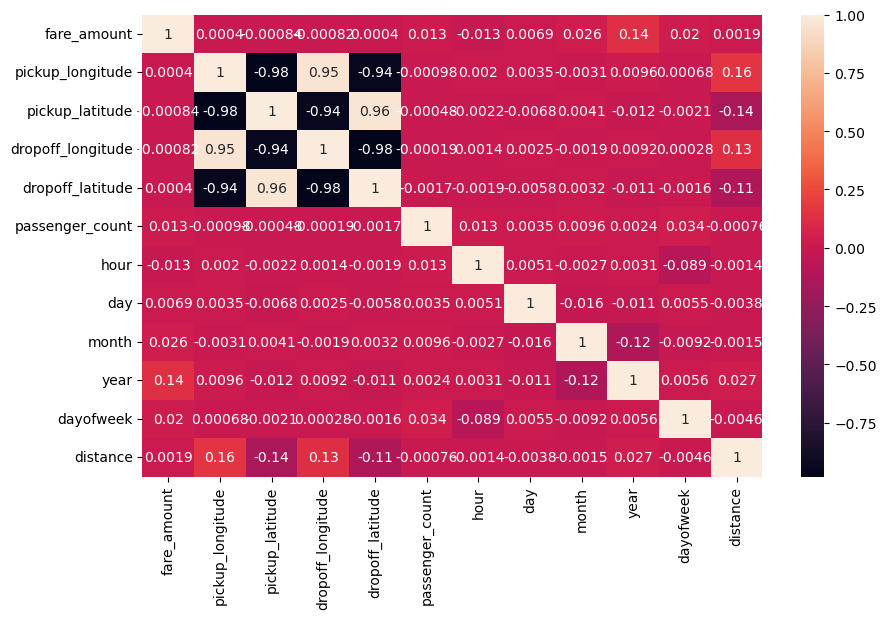

In [29]:
corr = data.corr() 
#Function to find the correlation corr 
fig,axis = plt.subplots(figsize = (10,6)) 
sns.heatmap(data.corr(),annot = True) 
#Correlation Heatmap (Light values means highly correlated)

# Dividing the dataset into feature and target values

In [30]:
x = data[['pickup_longitude',
          'pickup_latitude',
          'dropoff_longitude',
          'dropoff_latitude',
          'passenger_count',
          'hour',
          'day',
          'month',
          'year',
          'dayofweek',
          'distance']]
y = data['fare_amount']

# Dividing the dataset into training and testing dataset

In [31]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression() 
regression.fit(X_train,y_train) 
regression.intercept_    #To find the linear intercept 
regression.coef_    #To find the linear coeeficient
prediction = regression.predict(X_test)    #To predict the target values 
print(prediction) 
y_test

[8.02356141 9.58273148 9.482428   ... 9.39165739 8.19621164 9.36781082]


120344     5.3
171100     6.5
179433     5.0
54202      8.5
196192     9.3
          ... 
82674      8.1
140766     8.5
183780     7.5
21376     16.5
193268    12.0
Name: fare_amount, Length: 45706, dtype: float64

# Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error for Linear Regression

In [33]:
from sklearn.metrics import r2_score
linear_reg_r2 = r2_score(y_test,prediction)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
MSE
linear_reg_RMSE = np.sqrt(MSE)
linear_reg_RMSE

4.090930402718308

# Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([ 5.128,  7.565,  5.165, ...,  7.32 , 16.306, 15.43 ])

# Metrics evaluatin for Random Forest

In [36]:
random_forest_r2 = r2_score(y_test,y_pred)
random_forest_r2
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random
random_forest_RMSE = np.sqrt(MSE_Random)
random_forest_RMSE

2.0319980438964143

In [37]:
print(print("Model                  R2 Score     RMSE"))
print("Linear Regression      {:.4f}      {:.4f}".format(linear_reg_r2, linear_reg_RMSE))
print("Random Forest          {:.4f}      {:.4f}".format(random_forest_r2, random_forest_RMSE))

Model                  R2 Score     RMSE
None
Linear Regression      0.0215      4.0909
Random Forest          0.7586      2.0320


Based on these results, the Random Forest Regression model appears to be performing substantially better than the Linear Regression model